# 1. Importing Libraries

In [80]:
# First lets start by importing all the libs required
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# Clearing any backend session for the notebook if any
tf.keras.backend.clear_session()

# 2. Loading and processing the MNIST dataset

In [39]:
# Loading and process the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [40]:
# Looking at the data
print('x_train shape: {}\nx_test shape: {}\ny_train shape: {}\ny_test shape: {}'.format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))
# Looking at the raw data
print(x_train[0])
print(y_train[0])

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251

In [41]:
# Normaliseing the input to between 0 and 1 for the NNW to work better 
# Here we divide the input img by 255 as the values are 0-255
x_train = x_train / 255
x_test = x_test / 255

# Then we reshape the data for the model input
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# 3. Setting up the model using tf.keras, tf.keras.layer and tf.keras.model

In [42]:
# Here we will be setting up the model that we will be training to classify the MNIST digits
# The model structure will be loosely:
# Conv layers
# MaxPool layers
# Conv layers
# MaxPool layers
# flatten layer
# dense layers
# output
# Lastly, relu activations are used here as we do not have negative values for images
# However, the sigmoid activation is used for the dense layers, as we want the values to be between -1 and 1
# Note: The use of the activation function are based on my own thoughts and feeelings, I'm not really sure if it will help much

# Setting up inputs
input_img = keras.Input(shape=(28, 28, 1), name='MNIST_image_input')
# Setting up
model_layers = layers.Conv2D(14, 14, activation='relu')(input_img)
model_layers = layers.Conv2D(7, 7, activation='relu')(model_layers)
model_layers = layers.MaxPool2D(3)(model_layers)
model_layers = layers.Conv2D(2, 2, activation='relu')(model_layers)
model_layers = layers.Flatten()(model_layers)
model_layers = layers.Dense(256, activation='sigmoid')(model_layers)
model_layers = layers.Dense(128, activation='sigmoid')(model_layers)
model_layers = layers.Dense(10, activation='softmax')(model_layers)


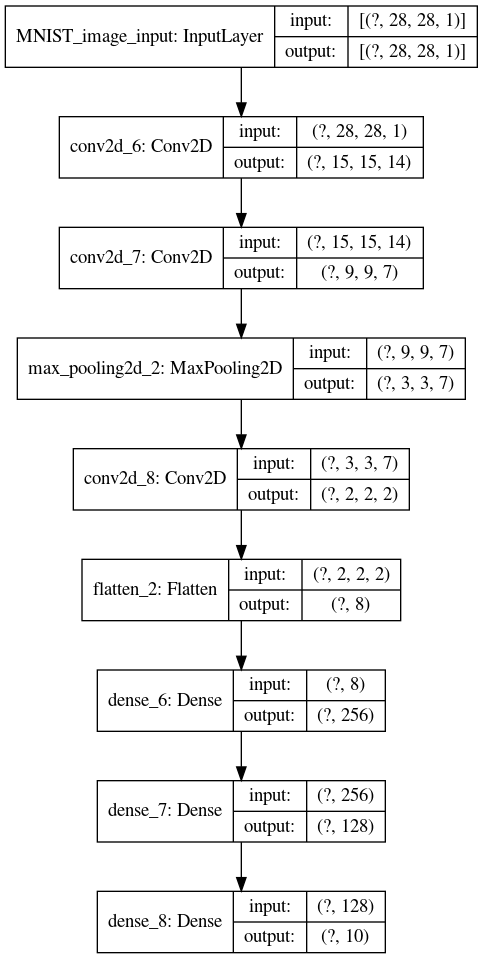

In [43]:
# Putting the layers together to create a layer
model = keras.Model(inputs=input_img, outputs=model_layers, name='MNIST_CNN_MODEL')
keras.utils.plot_model(model, show_shapes=True)

In [44]:
# Compiling the model
# Here we use sparse_categorical_crossentropy as the labels for the MNIST dataset are not one-hot encoded, and instead are just integers
# Also we are using the optimiser adam, because I mainly prefer it
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

# Training the model and look at its performance

In [45]:
# Here we are training the model
# The params are choosen cause the values look alright
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 62s 1ms/sample - loss: 0.6741 - accuracy: 0.7889 - val_loss: 0.2990 - val_accuracy: 0.9083
Epoch 2/10
48000/48000 [==============================] - 54s 1ms/sample - loss: 0.2690 - accuracy: 0.9185 - val_loss: 0.2139 - val_accuracy: 0.9349
Epoch 3/10
48000/48000 [==============================] - 53s 1ms/sample - loss: 0.2009 - accuracy: 0.9395 - val_loss: 0.1794 - val_accuracy: 0.9460
Epoch 4/10
48000/48000 [==============================] - 56s 1ms/sample - loss: 0.1694 - accuracy: 0.9500 - val_loss: 0.1478 - val_accuracy: 0.9555
Epoch 5/10
48000/48000 [==============================] - 49s 1ms/sample - loss: 0.1516 - accuracy: 0.9545 - val_loss: 0.1378 - val_accuracy: 0.9590
Epoch 6/10
48000/48000 [==============================] - 55s 1ms/sample - loss: 0.1338 - accuracy: 0.9593 - val_loss: 0.1323 - val_accuracy: 0.9595
Epoch 7/10
48000/48000 [==============================] 

In [57]:
# Looking at some of the raw values
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

print('Accuracy: {}'.format(acc))

Accuracy: [0.7888542, 0.9185208, 0.9394792, 0.95004165, 0.9545208, 0.95933336, 0.96347916, 0.9660417, 0.9680625, 0.9706875]


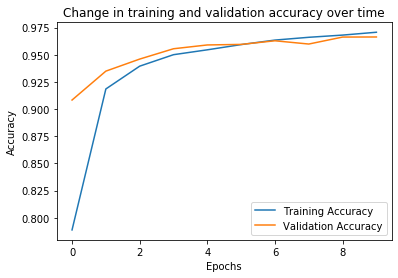

In [60]:
# Plotting the accuracy change over time
plt.plot(acc)
plt.plot(val_acc)
plt.title('Change in training and validation accuracy over time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])

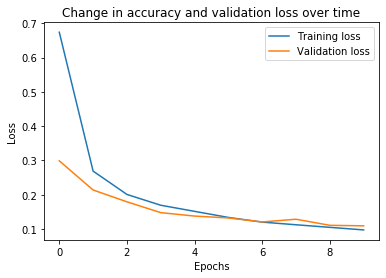

In [62]:
# Plotting the loss change over time
plt.plot(loss)
plt.plot(val_loss)
plt.title('Change in accuracy and validation loss over time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'])

Overall, the model did quite well on the MNIST dataset as expected. The accuracy and loss function looks as they should

# Looking at it predict an example

In [81]:
# Getting a random sample
import random
random_index = int(random.random() * x_test.shape[0])

random_image = x_test[random_index]
random_image = np.stack([random_image])

image_label = y_test[random_index]

In [85]:
pred = model.predict(random_image)

print(pred, image_label)

[[9.9973410e-01 1.2053005e-05 9.5298077e-05 5.1074344e-06 8.1294502e-06
  1.0292045e-05 4.7726980e-06 5.6364088e-06 1.2935285e-06 1.2323189e-04]] 0
